In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the data
df = pd.read_csv('OnlineRetail.csv')

In [3]:
#Loading few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#identfying cols that appear to be outlier
describe_data = df.describe()
print(describe_data)

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [5]:
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
#identfying missing data
missing_data = df.isnull().sum()
print(missing_data)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
#new customer id
null_cust = df[df.CustomerID.isnull()]
null_cust.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1537,536544,22207,FRYING PAN UNION FLAG,1,12/1/2010 14:32,8.47,NaN,United Kingdom
1538,536544,22219,LOVEBIRD HANGING DECORATION WHITE,3,12/1/2010 14:32,1.66,NaN,United Kingdom
1539,536544,22224,WHITE LOVEBIRD LANTERN,1,12/1/2010 14:32,5.91,NaN,United Kingdom
1540,536544,22265,EASTER DECORATION NATURAL CHICK,2,12/1/2010 14:32,1.28,NaN,United Kingdom


In [10]:
len(null_cust) / len(df)

0.249266943342886

In [11]:
len(df) / df['InvoiceNo'].nunique()

20.923127413127414

In [12]:
len(null_cust) / null_cust['InvoiceNo'].nunique()

36.40970350404313

In [13]:
# Filter rows where CustomerID is missing and select InvoiceNo and CustomerID columns
null_cust_data = df[df['CustomerID'].isna()][['InvoiceNo', 'CustomerID']]

# Display the result
print(null_cust_data)

       InvoiceNo  CustomerID
622       536414         NaN
1443      536544         NaN
1444      536544         NaN
1445      536544         NaN
1446      536544         NaN
...          ...         ...
541536    581498         NaN
541537    581498         NaN
541538    581498         NaN
541539    581498         NaN
541540    581498         NaN

[135080 rows x 2 columns]


In [14]:
#Assigning Unique Customer IDs Using factorize() in Pandas
# Find the minimum existing CustomerID
min_customer_id = df['CustomerID'].min()

# Find the maximum existing CustomerID
max_customer_id = df['CustomerID'].max()

# Mask for missing CustomerIDs
missing_mask = df['CustomerID'].isna()

# Generate unique new CustomerIDs, ensuring they start after the max existing ID
df.loc[missing_mask, 'CustomerID'] = (
    pd.factorize(df.loc[missing_mask, 'InvoiceNo'])[0] + max_customer_id + 1
)

# Display only the newly assigned CustomerIDs
print(df.loc[missing_mask, ['InvoiceNo', 'CustomerID']])

       InvoiceNo  CustomerID
622       536414     18288.0
1443      536544     18289.0
1444      536544     18289.0
1445      536544     18289.0
1446      536544     18289.0
...          ...         ...
541536    581498     21997.0
541537    581498     21997.0
541538    581498     21997.0
541539    581498     21997.0
541540    581498     21997.0

[135080 rows x 2 columns]


In [15]:

# Convert CustomerID to numeric (if it's not already)
df['CustomerID'] = pd.to_numeric(df['CustomerID'])

# Find the maximum existing CustomerID (handling NaN case)
max_customer_id = df['CustomerID'].max()
if pd.isna(max_customer_id):  
    max_customer_id = 0  # Ensure it starts from a valid number

# Mask for missing CustomerIDs
missing_mask = df['CustomerID'].isna()

# Generate unique new CustomerIDs, ensuring they start after the max existing ID
df.loc[missing_mask, 'CustomerID'] = (
    pd.factorize(df.loc[missing_mask, 'InvoiceNo'])[0] + max_customer_id + 1
)

# Create a new DataFrame with the imputed customer IDs
imputed_df = df.copy()
imputed_df.rename(columns={'CustomerID': 'ImputedCustomerID'}, inplace=True)

# Display imputed_df
print(imputed_df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  ImputedCustomerID         Country  
0  

In [16]:
print(df.isna().sum()) 

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [17]:
print(imputed_df.isna().sum()) 

InvoiceNo               0
StockCode               0
Description          1454
Quantity                0
InvoiceDate             0
UnitPrice               0
ImputedCustomerID       0
Country                 0
dtype: int64


In [18]:
# Step 1: Identify Negative Unit Prices
negative_prices = imputed_df[imputed_df['UnitPrice'] < 0]
print(negative_prices.head(10))  # Check negative UnitPrice transactions

       InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  ImputedCustomerID         Country  
299983  -11062.06            20786.0  United Kingdom  
299984  -11062.06            20787.0  United Kingdom  


In [19]:
# Step 2: Identify Zero Unit Prices
zero_prices = imputed_df[imputed_df['UnitPrice'] == 0]
print(zero_prices.head(10))  # Check zero UnitPrice transactions

     InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970    536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971    536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972    536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987    536549    85226A         NaN         1  12/1/2010 14:34        0.0   
1988    536550     85044         NaN         1  12/1/2010 14:34        0.0   
2024    536552     20950         NaN         1  12/1/2010 14:34        0.0   
2025    536553     37461         NaN         3  12/1/2010 14:35        0.0   
2026    536554     84670         NaN        23  12/1/2010 14:35        0.0   
2406    536589     21777         NaN       -10  12/1/2010 16:50        0.0   

      ImputedCustomerID         Country  
622             18288.0  United Kingdom  
1970            18290.0  United Kingdom  
1971           

In [20]:
# Step 3: Remove Negative and Zero Unit Prices
positive_prices = imputed_df[imputed_df['UnitPrice'] > 0]

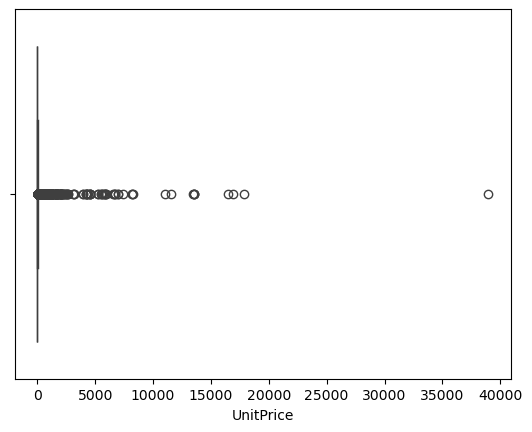

In [21]:
# Step 4: Visualizing Outliers in Unit Price
sns.boxplot(x=positive_prices['UnitPrice'])
plt.show()

In [22]:
# Step 5: Identify Outliers Using IQR Method
quartile1 = positive_prices['UnitPrice'].quantile(q=0.25)
quartile3 = positive_prices['UnitPrice'].quantile(q=0.75)
IQR = quartile3 - quartile1

lower_limit = quartile1 - 1.5 * IQR
upper_limit = quartile3 + 1.5 * IQR
print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")

Lower Limit: -3.0700000000000003, Upper Limit: 8.45


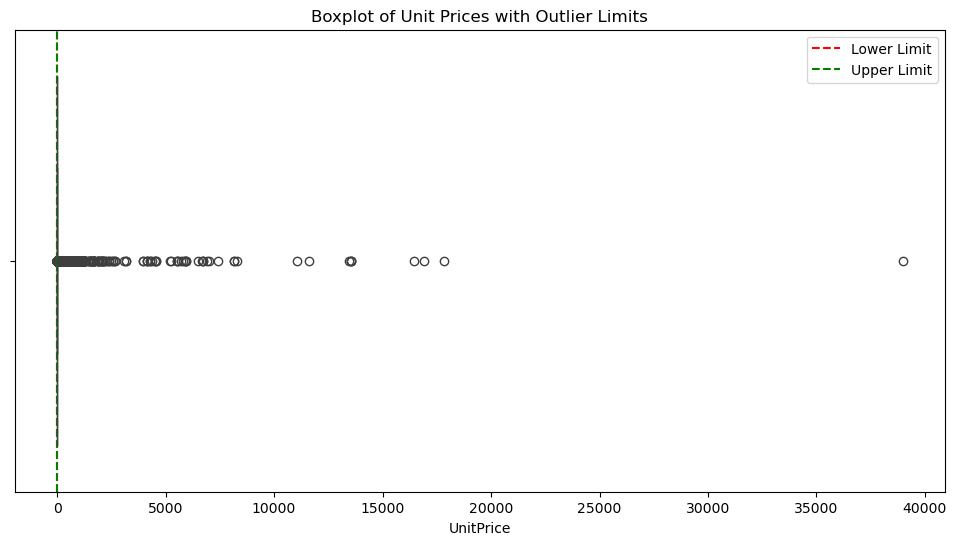

In [23]:
#Boxplot to Visualize Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=positive_prices['UnitPrice'])
plt.axvline(x=lower_limit, color='red', linestyle='dashed', label='Lower Limit')
plt.axvline(x=upper_limit, color='green', linestyle='dashed', label='Upper Limit')
plt.title("Boxplot of Unit Prices with Outlier Limits")
plt.legend()
plt.show()

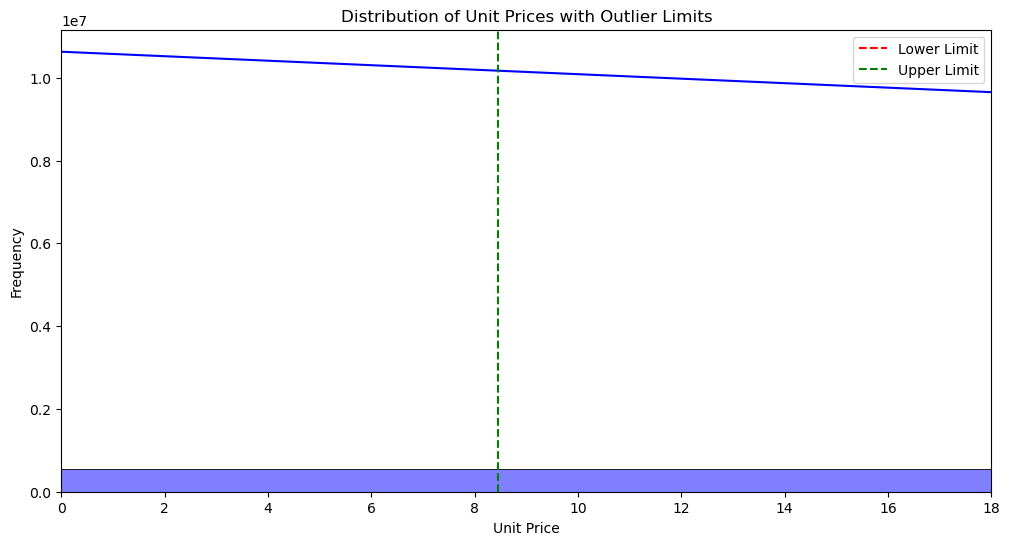

In [24]:
# Histogram to Show Distribution of Prices
plt.figure(figsize=(12, 6))
sns.histplot(positive_prices['UnitPrice'], bins=100, kde=True, color='blue')
plt.axvline(x=lower_limit, color='red', linestyle='dashed', label='Lower Limit')
plt.axvline(x=upper_limit, color='green', linestyle='dashed', label='Upper Limit')
plt.xlim(0, positive_prices['UnitPrice'].quantile(0.99))  # Focus on the main range
plt.title("Distribution of Unit Prices with Outlier Limits")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [25]:
# Step 6: Identify High-Price Outliers
price_outliers = positive_prices[positive_prices['UnitPrice'] > upper_limit]
sorted_outliers = price_outliers.sort_values(by=['UnitPrice'])
print(sorted_outliers.head(10))  # Check top high-price outliers

      InvoiceNo StockCode                          Description  Quantity  \
38097    539492     22502           PICNIC BASKET WICKER SMALL         1   
13862    537434    85034C          3 ROSE MORRIS BOXED CANDLES         1   
27833    538566    72802C    VANILLA SCENT CANDLE JEWELLED BOX         1   
27834    538566    72807C  SET/3 VANILLA SCENTED CANDLE IN BOX         2   
13807    537434    84030E        ENGLISH ROSE HOT WATER BOTTLE         3   
13793    537434    72807A    SET/3 ROSE CANDLE IN JEWELLED BOX         1   
13789    537434     71053                  WHITE METAL LANTERN         2   
27837    538566     79067                  CORONA MEXICAN TRAY         3   
13863    537434    85035A  GARDENIA 3 WICK MORRIS BOXED CANDLE         2   
27844    538566    84030E        ENGLISH ROSE HOT WATER BOTTLE         4   

            InvoiceDate  UnitPrice  ImputedCustomerID         Country  
38097  12/20/2010 10:14       8.47            18541.0  United Kingdom  
13862   12/6/2010 1

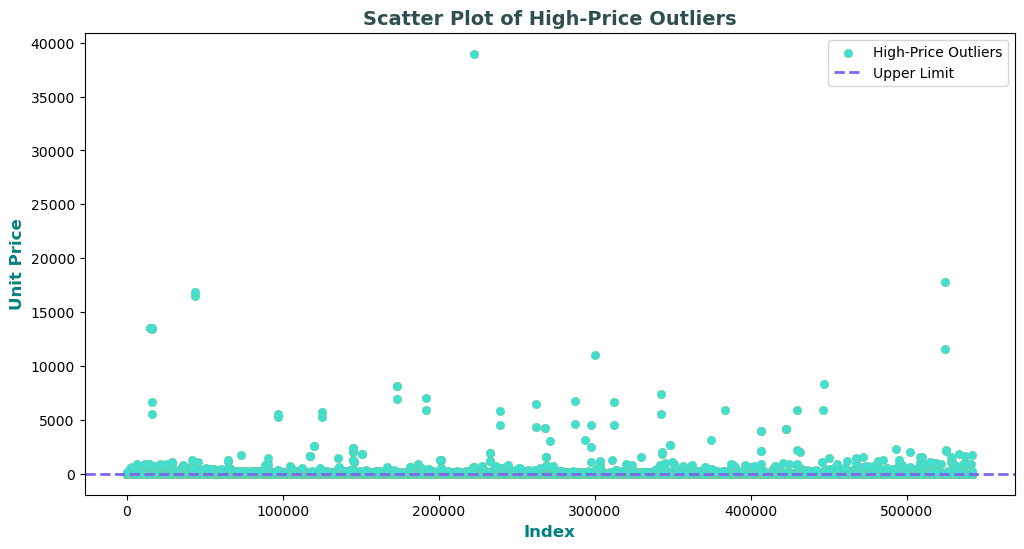

In [26]:
# Scatter Plot - Distribution of High-Price Outliers
plt.figure(figsize=(12, 6))

# Using turquoise for the scatter points with a contrasting cyan edge
sns.scatterplot(
    x=sorted_outliers.index, 
    y=sorted_outliers['UnitPrice'], 
    color='turquoise', 
    edgecolor='mediumaquamarine',  # A light contrasting outline
    label='High-Price Outliers'
)

# Adding a reference line for the upper limit
plt.axhline(y=upper_limit, color='mediumslateblue', linestyle='dashed', linewidth=2, label='Upper Limit')

# Customizing titles and labels with a matching color theme
plt.title("Scatter Plot of High-Price Outliers", fontsize=14, fontweight='bold', color='darkslategray')
plt.xlabel("Index", fontsize=12, fontweight='bold', color='teal')
plt.ylabel("Unit Price", fontsize=12, fontweight='bold', color='teal')

plt.legend()
plt.show()

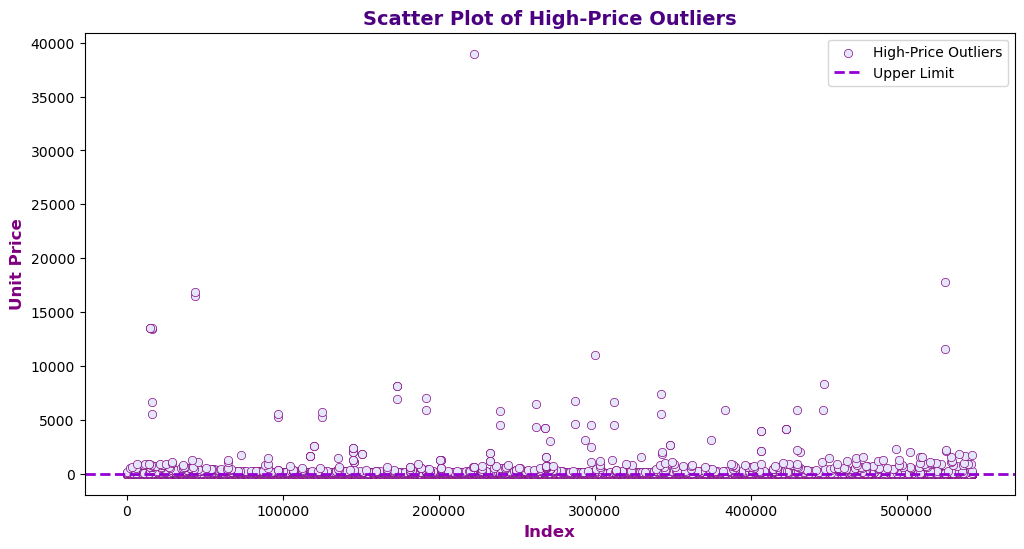

In [27]:
# Scatter Plot - High-Price Outliers
plt.figure(figsize=(12, 6))

# Using lavender color for the scatter points
sns.scatterplot(
    x=sorted_outliers.index, 
    y=sorted_outliers['UnitPrice'], 
    color='lavender', 
    edgecolor='purple',  # Adding a slight contrast with purple edges
    label='High-Price Outliers'
)

# Adding a reference line for the upper limit
plt.axhline(y=upper_limit, color='darkviolet', linestyle='dashed', linewidth=2, label='Upper Limit')

# Customizing titles and labels with matching theme
plt.title("Scatter Plot of High-Price Outliers", fontsize=14, fontweight='bold', color='indigo')
plt.xlabel("Index", fontsize=12, fontweight='bold', color='purple')
plt.ylabel("Unit Price", fontsize=12, fontweight='bold', color='purple')

plt.legend()
plt.show()

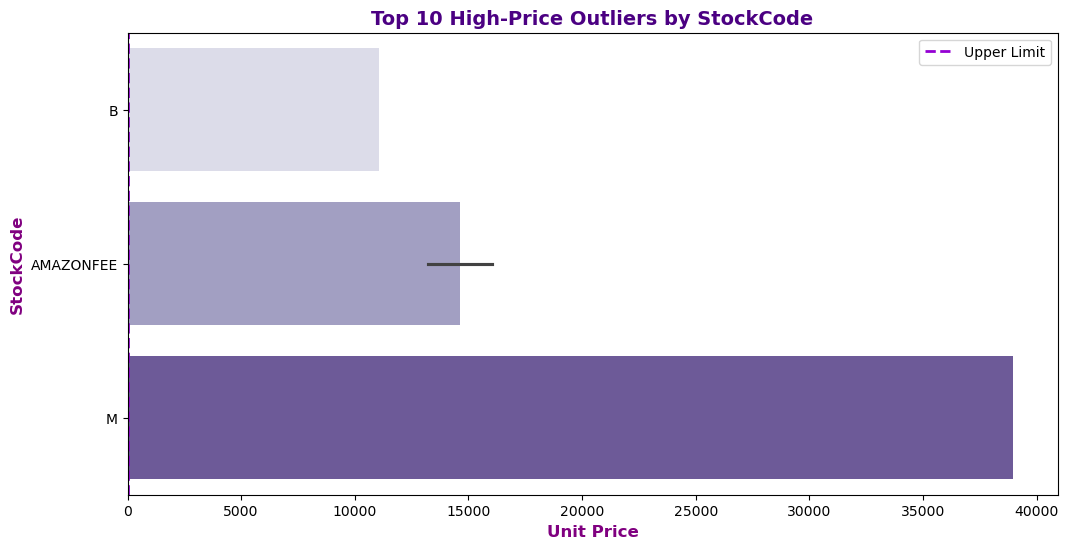

In [28]:
# Bar Plot - Top 10 High-Price Outliers
top_10_outliers = sorted_outliers.tail(10)  # Select the highest 10 outliers

plt.figure(figsize=(12, 6))

# Assign 'StockCode' as hue to properly use the palette and avoid FutureWarning
sns.barplot(
    x=top_10_outliers['UnitPrice'], 
    y=top_10_outliers['StockCode'], 
    hue=top_10_outliers['StockCode'],  # Assigning hue
    palette=sns.color_palette("Purples", n_colors=len(top_10_outliers['StockCode'].unique())), 
    legend=False  # Hides excessive legend entries
)

plt.axvline(x=upper_limit, color='darkviolet', linestyle='dashed', linewidth=2, label='Upper Limit')
plt.title("Top 10 High-Price Outliers by StockCode", fontsize=14, fontweight='bold', color='indigo')
plt.xlabel("Unit Price", fontsize=12, fontweight='bold', color='purple')
plt.ylabel("StockCode", fontsize=12, fontweight='bold', color='purple')

plt.legend()
plt.show()

In [29]:
# Step 7: Identify Non-Purchase Stock Codes
invalid_stock_codes = ['DOT', 'M', 'D', 'S', 'POST', 'BANK CHARGES', 'C2', 'AMAZONFEE', 'CRUK', 'B']

In [30]:
# Step 8: Remove Transactions That Do Not Represent Actual Purchases
clean = positive_prices[~positive_prices['StockCode'].isin(invalid_stock_codes)]

In [31]:
# Step 9: Final Check on Remaining Data
print(clean.sort_values(by=['UnitPrice'], ascending=False).head(10))  # Check high values after cleaning

       InvoiceNo StockCode                     Description  Quantity  \
222680    556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
222682    556446     22502  PICNIC BASKET WICKER 60 PIECES         1   
32484     539080     22655     VINTAGE RED KITCHEN CABINET         1   
82768     543253     22655     VINTAGE RED KITCHEN CABINET         1   
171178    551393     22656    VINTAGE BLUE KITCHEN CABINET         1   
118769    546480     22656    VINTAGE BLUE KITCHEN CABINET         1   
51636     540647     22655     VINTAGE RED KITCHEN CABINET         1   
36165    C539438     22655     VINTAGE RED KITCHEN CABINET        -1   
133994    547814     22656    VINTAGE BLUE KITCHEN CABINET         1   
87141    C543632     22655     VINTAGE RED KITCHEN CABINET        -1   

             InvoiceDate  UnitPrice  ImputedCustomerID         Country  
222680   6/10/2011 15:28      649.5            15098.0  United Kingdom  
222682   6/10/2011 15:33      649.5            15098.0  Unite

In [32]:
# Step 10: Deliverable - Final Clean DataFrame
print(f"Final cleaned dataset contains {len(clean)} rows.")

Final cleaned dataset contains 536497 rows.


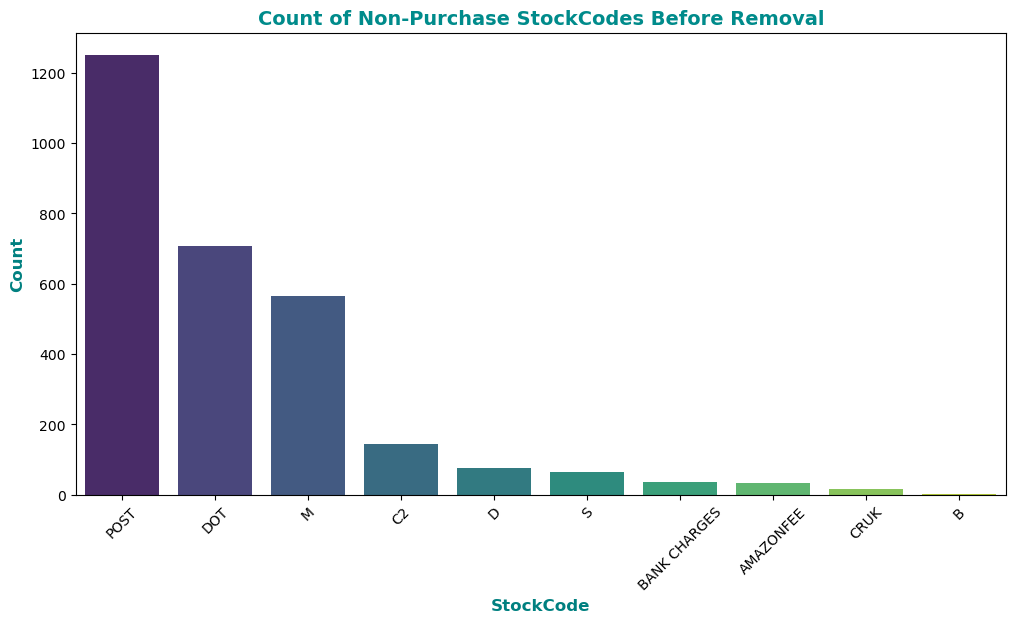

In [33]:
# Bar Plot - Count of Non-Purchase StockCodes Before Removal
invalid_counts = positive_prices[positive_prices['StockCode'].isin(invalid_stock_codes)]['StockCode'].value_counts()

plt.figure(figsize=(12, 6))

# Assigning `x` as `hue` to avoid FutureWarning and using a unique teal/cyan palette
sns.barplot(
    x=invalid_counts.index, 
    y=invalid_counts.values, 
    hue=invalid_counts.index,  # Assign hue to match unique colors
    palette=sns.color_palette("viridis", n_colors=len(invalid_counts)),  
    legend=False  # Hide redundant legend
)

plt.title("Count of Non-Purchase StockCodes Before Removal", fontsize=14, fontweight='bold', color='darkcyan')
plt.xlabel("StockCode", fontsize=12, fontweight='bold', color='teal')
plt.ylabel("Count", fontsize=12, fontweight='bold', color='teal')

plt.xticks(rotation=45)
plt.show()